In [ ]:
!gdown --id 1ihs_nWFW09VqvRYGZ3PauuomAZjR9bnR

Downloading...
From: https://drive.google.com/uc?id=1ihs_nWFW09VqvRYGZ3PauuomAZjR9bnR
To: /content/realest.csv
100% 4.08k/4.08k [00:00<00:00, 8.95MB/s]


# **Pipeline**

1. Collect
2. List item
3. Extract Features
4. Split Training and test
5. Train
6. Evalute
7. Create Pipeline
8. Deployment



# 1. Collect Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
valuation_df = pd.read_csv('realest.csv')[:-1]
valuation_df

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


In [ ]:
valuation_df.tail(10)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
146,64.0,2.0,1114.0,7.0,30.0,746.0,2.0,0.0,1.0
147,66.0,4.0,NaN,8.0,37.0,565.0,2.0,2.0,0.0
148,69.0,1.0,957.0,5.0,NaN,1287.0,1.0,1.0,0.0
149,32.0,4.0,1065.0,7.0,25.0,492.0,1.5,0.0,0.0
150,42.0,2.0,639.0,6.0,25.0,NaN,1.0,0.0,0.0
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [ ]:
def collect_data():
  valuation_df = pd.read_csv('realest.csv')
  return valuation_df

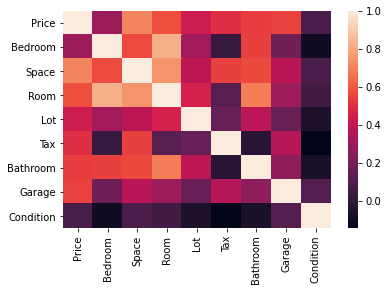

In [ ]:
sns.heatmap(valuation_df.corr())

In [ ]:
valuation_df.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1094.410256,6.500000,32.808219,906.474359,1.480769,0.846154,0.230769
std,12.875307,1.348037,447.503381,1.675247,8.180476,430.724962,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,818.750000,5.000000,25.000000,674.250000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,1016.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1183.000000,7.000000,35.500000,986.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


# 2. Clean Data

In [ ]:
valuation_df.head(10)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
5,44.0,4.0,897.0,7.0,25.0,960.0,2.0,1.0,0.0
6,49.0,5.0,1400.0,8.0,NaN,678.0,1.0,1.0,1.0
7,70.0,3.0,2261.0,6.0,29.0,2700.0,1.0,2.0,0.0
8,72.0,4.0,1290.0,8.0,NaN,800.0,1.5,1.5,0.0
9,82.0,4.0,2104.0,9.0,40.0,1038.0,2.5,1.0,1.0


In [ ]:
valuation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.1 KB


In [ ]:
valuation_df.isna().sum()

Price         0
Bedroom       0
Space        10
Room          0
Lot          10
Tax           9
Bathroom      0
Garage        0
Condition     0
dtype: int64

In [ ]:
space_mode = valuation_df.Space.mode()
space_mode

0    1053.0
dtype: float64

In [ ]:
space_mean = valuation_df.Space.mean()
space_mean

1097.2465753424658

In [ ]:
space_median = valuation_df.Space.median()
space_median

965.5

In [ ]:
lot_mode = valuation_df.Lot.mode()
lot_mode

0    25.0
1    30.0
dtype: float64

In [ ]:
lot_mean = valuation_df.Lot.mean()
lot_mean

32.80821917808219

In [ ]:
lot_median = valuation_df.Lot.median()
lot_median

30.0

In [ ]:
tax_mode = valuation_df.Tax.mode()
tax_mode

0     531.0
1     536.0
2     565.0
3     621.0
4     722.0
5     867.0
6     880.0
7     970.0
8    1287.0
dtype: float64

In [ ]:
tax_mean = valuation_df.Tax.mean()
tax_mean

911.7074829931972

In [ ]:
tax_median = valuation_df.Tax.median()
tax_median

821.0

In [ ]:
def clean_data(df):
  for col in df.columns:
    if col == 'Space':    
      # space_mode = df[col].mode()[0]
      # df[col] = df[col].fillna(space_mode)

      # space_mean = df[col].mean()
      # df[col] = df[col].fillna(space_mean)  

      space_median = df[col].median()
      df[col] = df[col].fillna(space_median)

    elif col == 'Lot':
      # lot_mean = df[col].mean()
      # df[col] = df[col].fillna(lot_mean)  

      lot_median = df[col].median()
      df[col] = df[col].fillna(lot_median)

    elif col == 'Tax':
      # tax_mean = df[col].mean()
      # df[col] = df[col].fillna(tax_mean)  

      tax_median = df[col].median()
      df[col] = df[col].fillna(tax_median)

  clean_df = df 
  return clean_df 

In [ ]:
clean_df = clean_data(valuation_df)

# 3. Extract Features

In [ ]:
def extract_feature(df, is_training=True):
  feat_df = df.copy()
  label_df = []

  if 'Price' in feat_df.columns:
    label_df = feat_df['Price']

  # drop unused columns
  if is_training:
    feat_df = feat_df.drop(['Price'], axis=1)
  
  for col in feat_df.columns:
    feat_df[col] = pd.to_numeric(feat_df[col], errors='coerce')

  return feat_df, label_df

In [ ]:
feat_df, label_df = extract_feature(clean_df)

In [ ]:
feat_df

,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...
151,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
152,3.0,820.0,5.0,27.0,821.0,1.0,0.0,1.0
153,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


In [ ]:
label_df

0      53.0
1      55.0
2      56.0
3      58.0
4      64.0
       ... 
151    42.0
152    44.0
153    43.0
154    53.0
155    62.0
Name: Price, Length: 156, dtype: float64

# 4. Train & test split

In [ ]:
len(feat_df)

156

In [ ]:
from sklearn.model_selection import train_test_split
train_feat, test_feat, train_label, test_label = \
          train_test_split(feat_df, label_df, test_size=0.2, random_state=10)

In [ ]:
len(train_feat)

124

In [ ]:
len(test_feat)

32

In [ ]:
def split_train_test(feat, label):
  train_feat, test_feat, train_label, test_label = \
          train_test_split(feat, label, test_size=0.2, random_state=42)
  return train_feat, test_feat, train_label, test_label

# 5. Train

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree

In [ ]:
def train_model(feat, label):
  # Random forrest
  model = RandomForestRegressor(max_depth=1000, random_state=2020)
  
  # Gradient Boosting
  # model = GradientBoostingRegressor(random_state=2020)

  # Decision Tree
  # model = tree.DecisionTreeRegressor(max_depth=1000, random_state=2020)  

  model.fit(feat, label)
  return model

In [ ]:
model = train_model(train_feat, train_label)

# 6. Evaluation

In [ ]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=1000, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2020, verbose=0, warm_start=False)

In [ ]:
predict = model.predict(test_feat)

In [ ]:
predict

array([60.88, 87.86, 49.9 , 52.91, 62.26, 63.43, 43.32, 46.24, 67.19,
       63.07, 83.33, 47.93, 64.07, 62.86, 46.56, 48.78, 57.9 , 44.71,
       64.65, 50.49, 52.01, 50.54, 43.79, 46.53, 57.04, 55.76, 63.55,
       53.75, 57.26, 57.63, 56.27, 56.53])

In [ ]:
def eval_acc(prediction, actual):
  acc = sum(prediction == actual) / len(actual)
  return acc

In [ ]:
eval_acc(predict,test_label)

0.0

In [ ]:
from sklearn.metrics import mean_squared_error

def eval_rmse(predict, actual):
  return np.sqrt(mean_squared_error(predict, actual))

def rmse(predict,test_label):
  diff = predict - test_label
  return np.sqrt(sum(diff**2)/len(diff))

In [ ]:
eval_rmse(predict, test_label)

5.794290832362491

In [ ]:
rmse(predict, test_label)

5.794290832362492

# 7. Pipeline

In [ ]:
def pipeline():
  # collect data
  valuation_df = collect_data()

  # clean data
  clean_df = clean_data(valuation_df)

  # extract features
  train_df, test_df = extract_feature(clean_df)

  # split training and test
  train_feat, test_feat, train_label, test_label = \
        split_train_test(feat_df, label_df)

  # Train
  model = train_model(train_feat, train_label)

  # Evaluate
  predict = model.predict(test_feat)
  print('error score', eval_rmse(predict, test_label))

In [ ]:
pipeline()

error score 8.097471470765287


# 8. Deployment

In [ ]:
#@title Estimate your startup valuation

answer_list = []
Bedroom = 2#@param {type:"number"}
Space	= 1000#@param {type:"number"}
Room	= 5#@param {type:"number"}
Lot	= 39#@param {type:"number"}
Tax	= 652#@param {type:"number"}
Bathroom	= 1.5#@param {type:"number"}
Garage	= 0#@param {type:"number"}
Condition = False #@param {type:"boolean"}

col = ['Bedroom', 'Space',	'Room',	'Lot',	'Tax',	'Bathroom', \
       'Garage',	'Condition']

predict_df = pd.DataFrame([[Bedroom, Space,	Room,	Lot,	Tax,	Bathroom,	\
                           Garage,	Condition]], columns=col)

test_df = pd.concat([predict_df, clean_df[col]], axis=0)
test, _ = extract_feature(test_df, is_training=False)
print('Your startup valuation is: ', model.predict(test.iloc[:1])[0])